### Import Dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import datetime
from sklearn.preprocessing import OneHotEncoder

### Data Analysis

In [2]:
data = pd.read_csv('./data/CAR DETAILS FROM CAR DEKHO.csv') #CAR DETAILS FROM CAR DEKHO.csv
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [4]:
data.shape

(4340, 8)

In [5]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
print(data.fuel.value_counts())
print(data.transmission.value_counts())
print(data.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


### Data Pre-processing

In [8]:
date = datetime.date.today()
data['vehicle_age'] = [int(date.strftime('%Y')) - int(x) for x in data['year'] ]

In [9]:
encoder = OneHotEncoder(sparse_output=False)

columns_to_encode = ['fuel','transmission','owner']

encoded_data = encoder.fit_transform(data[columns_to_encode])
encoded_data = pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out(columns_to_encode))
data.drop(columns=columns_to_encode,inplace=True,axis=1)
data = pd.concat([data,encoded_data],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        4340 non-null   object 
 1   year                        4340 non-null   int64  
 2   selling_price               4340 non-null   int64  
 3   km_driven                   4340 non-null   int64  
 4   seller_type                 4340 non-null   object 
 5   vehicle_age                 4340 non-null   int64  
 6   fuel_CNG                    4340 non-null   float64
 7   fuel_Diesel                 4340 non-null   float64
 8   fuel_Electric               4340 non-null   float64
 9   fuel_LPG                    4340 non-null   float64
 10  fuel_Petrol                 4340 non-null   float64
 11  transmission_Automatic      4340 non-null   float64
 12  transmission_Manual         4340 non-null   float64
 13  owner_First Owner           4340 

In [10]:
data.head()

,name,year,selling_price,km_driven,seller_type,vehicle_age,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti 800 AC,2007,60000,70000,Individual,17,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Individual,17,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Individual,12,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,Datsun RediGO T Option,2017,250000,46000,Individual,7,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Individual,10,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [11]:
X = data.drop(columns=['name','year','seller_type','selling_price'],axis=1)
y = data['selling_price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Model Training

In [12]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
model2 = Lasso()
model2.fit(X_train,y_train)

d:\DevStudio\Python learning & projects\practicevenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.537e+12, tolerance: 1.187e+11
  model = cd_fast.enet_coordinate_descent(


Lasso()

### Model evaluations

#### Linear Regression

##### Training evaluations

In [14]:
# training predictions
training_predictions = model.predict(X_train)
training_error = r2_score(y_train,training_predictions.round(2))
print(f'Training error: {training_error}')

Training error: 0.4660869737002915


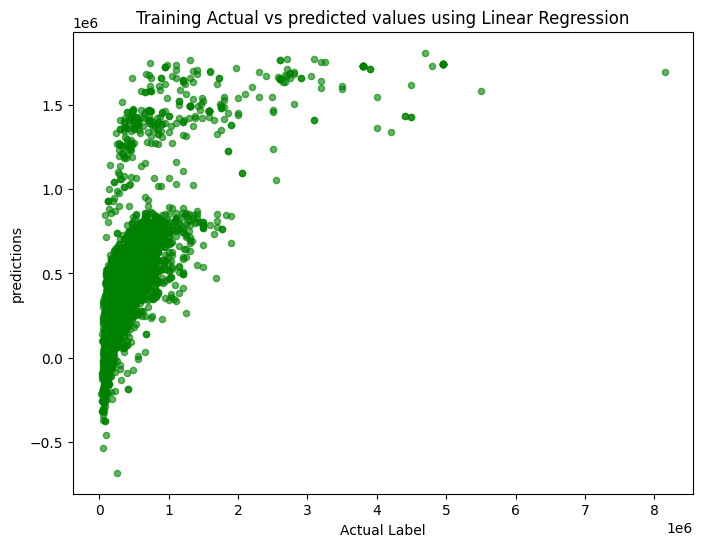

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, training_predictions,s=20 ,color='green', label='Predicted values', alpha=0.6)
plt.xlabel("Actual Label")
plt.ylabel("predictions")
plt.title("Training Actual vs predicted values using Linear Regression")
plt.show()

##### Model Testing

In [16]:
test_predictions = model.predict(X_test)
test_error = r2_score(y_test,test_predictions)
print(f'R2 squared error: {test_error}')

R2 squared error: 0.39885608946336815


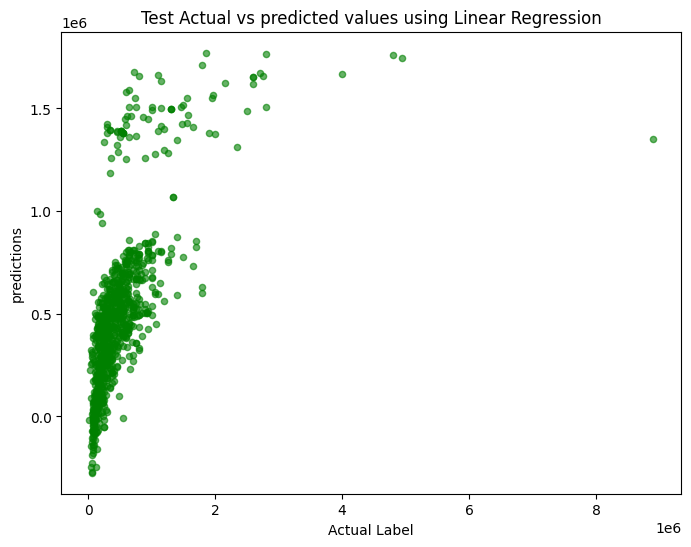

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_predictions,s=20 ,color='green', label='Predicted values', alpha=0.6)
plt.xlabel("Actual Label")
plt.ylabel("predictions")
plt.title("Test Actual vs predicted values using Linear Regression")
plt.show()

#### Lasso Regression

##### Training evaluations

In [18]:
# training predictions
training_predictions2 = model2.predict(X_train)
training_error2 = r2_score(y_train,training_predictions2.round(2))
print(f'R2 squared error: {training_error2}')

R2 squared error: 0.46608696175536257


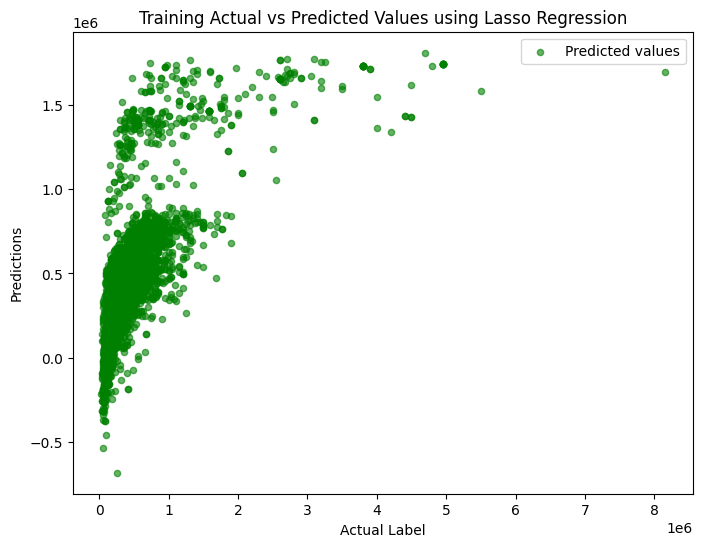

In [19]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_train, training_predictions2,s=20 ,color='green', label='Predicted values', alpha=0.6)
plt.xlabel("Actual Label")
plt.ylabel("Predictions")
plt.title("Training Actual vs Predicted Values using Lasso Regression")
plt.legend()
plt.show()

##### Model Testing

In [20]:
test_predictions2 = model2.predict(X_test)
test_error2 = r2_score(y_test,test_predictions2)
print(f'R2 squared error: {test_error2}')

R2 squared error: 0.3988569183865073


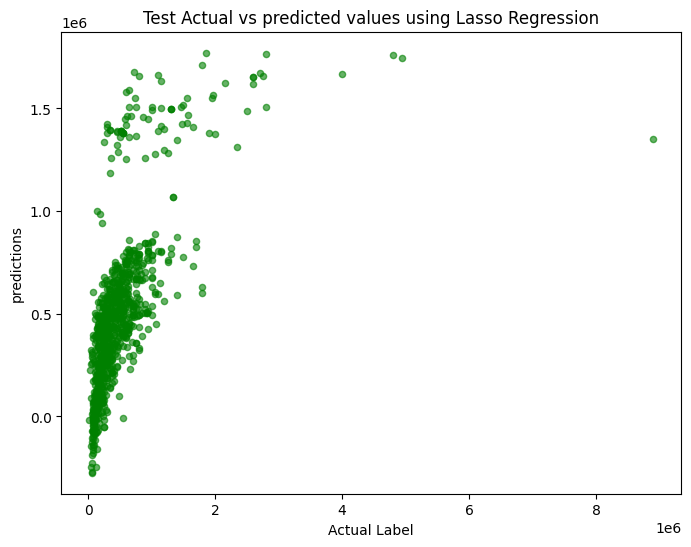

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_predictions2,s=20 ,color='green', label='Predicted values', alpha=0.6)
plt.xlabel("Actual Label")
plt.ylabel("predictions")
plt.title("Test Actual vs predicted values using Lasso Regression")
plt.show()